# Pushups Tracker

In [2]:
# Description
# Program to manage my pushup workouts

# Features
# - Reads an excel file containing pushups data
# - Displays a chart of target vs actual pushups
# - Displays a chart of daily max pushups
# - Gives a recommendation for next workout

In [1]:
# Imports

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Read the raw data file and create a DataFrame

pushups_raw = pd.read_excel("PushupsData.xlsx")

In [22]:
# Create a new DataFrame for derived daily target and actual values

days = pd.Series([], name='Day')
target_sums = pd.Series([], name='TargetSum')
actual_sums = pd.Series([], name='ActualSum')
daily_max = pd.Series([], name='DailyMax') # Note this isn't put into the pusups_derived DataFrame yet
i = 0

while i < pushups_raw.Day.max():
    days[i] = i+1
    target_sums[i] = pushups_raw.Target[(pushups_raw.Day == (i+1))].sum()
    actual_sums[i] = pushups_raw.Actual[(pushups_raw.Day == (i+1))].sum()
    daily_max[i] = pushups_raw.Actual[(pushups_raw.Day == (i+1))].max()
    i = i + 1

pushups_derived = pd.DataFrame({'Day': days, 'TargetSum': target_sums, 'ActualSum': actual_sums, 'DailyMax': daily_max})
pushups_derived.set_index('Day', inplace=True)

In [24]:
# Review the newly created data structure

#pushups_derived.head(3)

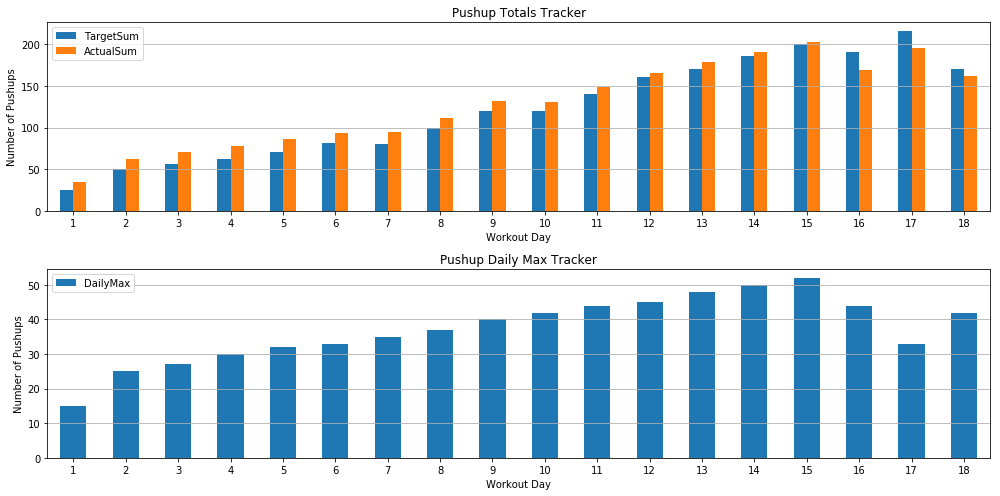

In [54]:
# Visualize the data
fig, axes = plt.subplots(figsize=(14,7), nrows=2, ncols=1)

# Graph of Target and Actual Sums
g1 = pushups_derived[['TargetSum', 'ActualSum']].plot(ax=axes[0], kind='bar', rot=0)
g1.set_title('Pushup Totals Tracker')
g1.set_xlabel('Workout Day')
g1.set_ylabel('Number of Pushups')
g1.grid(axis='y')

# Graph of Daily Max Pushups
g2 = pushups_derived[['DailyMax']].plot(ax=axes[1], kind='bar', rot=0)
g2.set_title('Pushup Daily Max Tracker')
g2.set_xlabel('Workout Day')
g2.set_ylabel('Number of Pushups')
g2.grid(axis='y')
g2.legend(loc='upper left')

plt.tight_layout() # Not sure but this might override the figsize argument of subplots above
plt.show()

# Export the chart to a file
#plt.savefig("Pushups.png") # save as png file

In [76]:
# Analysis and Recommendations

# Calculate initial sets total reps
initial_sets = pushups_derived['ActualSum'].iloc[-1] - pushups_derived['DailyMax'].iloc[-1]

# Recap last workout
print("Last workout your performance was...")
print("- Initial Sets Total: " + str(initial_sets) + " reps")
print("- Final Set Total:     " + str(pushups_derived['DailyMax'].iloc[-1]) + " reps")
print("- Grand Total:        " + str(pushups_derived['ActualSum'].iloc[-1]) + " reps\n")

# Give recommendation for next workout based on last workout performance
print("Next workout try for...")
print("- Initial Sets Total: " + str(initial_sets + 9) + " reps")
print("- Final Set Total:     " + str(pushups_derived['DailyMax'].iloc[-1] + 1) + " reps")
print("- Grand Total:        " + str(pushups_derived['ActualSum'].iloc[-1] + 10) + " reps\n")

Last workout your performance was...
- Initial Sets Total: 120 reps
- Final Set Total:     42 reps
- Grand Total:        162 reps

Next workout try for...
- Initial Sets Total: 129 reps
- Final Set Total:     43 reps
- Grand Total:        172 reps

